### Proyecto No.1
- Diego Cordóva 20312
- Paola De León 20361
- Gabriela Contreras 20213

In [2]:
import skimage
import numpy as np 
from skimage import io, morphology, color
import matplotlib.pyplot as plt

##### PARTE NO. 1
------

##### PARTE NO. 2
------

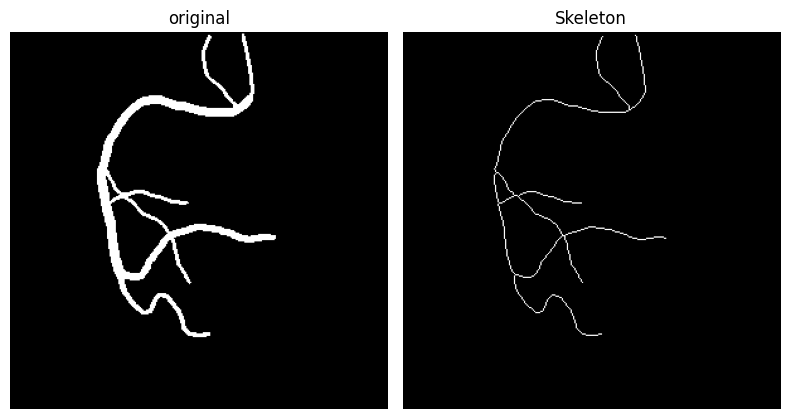

In [3]:
from skimage import morphology as mo
from skimage.morphology import medial_axis, skeletonize

def read_img(filepath):
    data = open(filepath, 'rb')
    img = plt.imread(data)
    return img

def create_skeleton(img):
    T = mo.thin(img)
    skeleton_lee = skeletonize(T, method='lee')
    return skeleton_lee

# ejemplo de uso
img = read_img('./database/1_gt.pgm')
skel = create_skeleton(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skel, cmap='gray')
ax[1].set_title('Skeleton')
ax[1].axis('off')

fig.tight_layout()
plt.show()

**Nodos Intermedios**

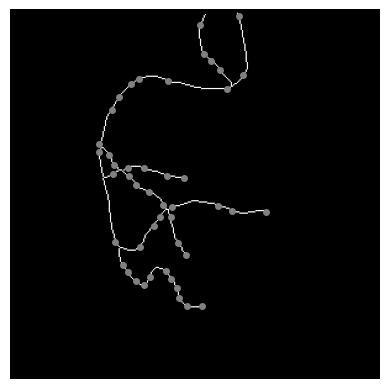

In [4]:
from skimage.feature import corner_peaks, corner_fast, corner_harris

def draw_with_coords(og_img, coords: list[dict[list, str]]):
    fig, ax = plt.subplots()
    ax.imshow(og_img, cmap=plt.cm.gray)

    for cor in coords:
        actual_coords = cor['coords']
        actual_color = cor['color']
        ax.plot(actual_coords[:, 1], actual_coords[:, 0], color=actual_color, marker='o', linestyle='None', markersize=4)

    ax.axis('off')
    plt.show()

def get_nodes(image):
    corner_image = corner_fast(image)
    coords = corner_peaks(corner_image, min_distance=5, threshold_rel=0.3)
    return coords, corner_image

node_coords, corner_img = get_nodes(skel)
draw_with_coords(skel, [{'coords': node_coords, 'color': 'gray'}])

**Bifurcaciones**

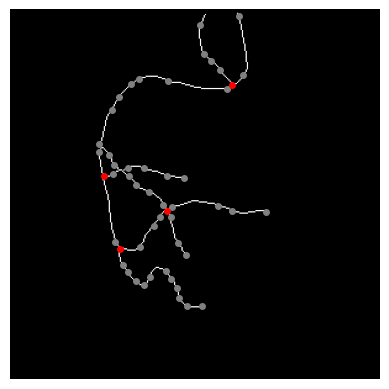

In [5]:
from skimage.feature import corner_peaks, corner_harris


def get_difurcations(image):
    corner_image = corner_harris(image)
    coords = corner_peaks(corner_image, min_distance=15, threshold_rel=0.5)
    return coords, corner_image

coords_difurcations, corner_img = get_difurcations(skel)

draw_with_coords(skel, [
    {'coords': node_coords, 'color': 'gray'},
    {'coords': coords_difurcations, 'color': 'red'},
])


In [1]:
from math import sqrt
from skimage.feature import corner_foerstner


def get_extremes(image):
    corner_image = corner_foerstner(image)
    coords = corner_peaks(corner_image, min_distance=15, threshold_rel=0.04)
        
    return coords, corner_image

extremes, corner_img = get_extremes(skel)

draw_with_coords(skel, [
    {'coords': node_coords, 'color': 'gray'},
    {'coords': coords_difurcations, 'color': 'red'},
    {'coords': extremes, 'color': 'green'},
])

NameError: name 'skel' is not defined

In [6]:
from PIL import Image
import numpy as np

# Convertir la imagen a un array de NumPy
imagen_np = np.array(skel)

# Encontrar las coordenadas donde el valor es 255
# np.where devuelve dos arrays: uno para las filas y otro para las columnas de los valores encontrados
coordenadas = np.where(imagen_np == 255)

# Las coordenadas están en dos arrays separados, puedes zippearlos para obtener pares de coordenadas (x, y)
coordenadas_xy = list(zip(coordenadas[1], coordenadas[0]))  # Nota: invertimos fila por columna para obtener (x, y)

# Imprimir las coordenadas
for x, y in coordenadas_xy:
    print(f"Coordenada con valor 255: ({x}, {y})")


Coordenada con valor 255: (184, 3)
Coordenada con valor 255: (158, 4)
Coordenada con valor 255: (185, 4)
Coordenada con valor 255: (157, 5)
Coordenada con valor 255: (185, 5)
Coordenada con valor 255: (157, 6)
Coordenada con valor 255: (185, 6)
Coordenada con valor 255: (156, 7)
Coordenada con valor 255: (185, 7)
Coordenada con valor 255: (156, 8)
Coordenada con valor 255: (185, 8)
Coordenada con valor 255: (156, 9)
Coordenada con valor 255: (186, 9)
Coordenada con valor 255: (155, 10)
Coordenada con valor 255: (186, 10)
Coordenada con valor 255: (155, 11)
Coordenada con valor 255: (186, 11)
Coordenada con valor 255: (154, 12)
Coordenada con valor 255: (187, 12)
Coordenada con valor 255: (154, 13)
Coordenada con valor 255: (187, 13)
Coordenada con valor 255: (154, 14)
Coordenada con valor 255: (187, 14)
Coordenada con valor 255: (153, 15)
Coordenada con valor 255: (187, 15)
Coordenada con valor 255: (153, 16)
Coordenada con valor 255: (187, 16)
Coordenada con valor 255: (153, 17)
Coord

In [14]:
print(coordenadas_xy)
count_x = 1
x_D  = {}
for x, y in coordenadas_xy:
    if x in x_D:
        count_x += 1
        x_D[x] = count_x  
    else:
        x_D[x] = count_x
print(x_D)

[(184, 3), (158, 4), (185, 4), (157, 5), (185, 5), (157, 6), (185, 6), (156, 7), (185, 7), (156, 8), (185, 8), (156, 9), (186, 9), (155, 10), (186, 10), (155, 11), (186, 11), (154, 12), (187, 12), (154, 13), (187, 13), (154, 14), (187, 14), (153, 15), (187, 15), (153, 16), (187, 16), (153, 17), (188, 17), (153, 18), (188, 18), (153, 19), (188, 19), (153, 20), (188, 20), (153, 21), (188, 21), (153, 22), (188, 22), (153, 23), (189, 23), (154, 24), (189, 24), (154, 25), (189, 25), (154, 26), (189, 26), (154, 27), (189, 27), (154, 28), (190, 28), (154, 29), (190, 29), (155, 30), (190, 30), (155, 31), (190, 31), (155, 32), (190, 32), (155, 33), (190, 33), (156, 34), (191, 34), (156, 35), (191, 35), (157, 36), (191, 36), (158, 37), (191, 37), (159, 38), (191, 38), (160, 39), (191, 39), (161, 40), (162, 40), (191, 40), (163, 41), (191, 41), (164, 42), (191, 42), (165, 43), (192, 43), (166, 44), (192, 44), (167, 45), (192, 45), (168, 46), (192, 46), (169, 47), (192, 47), (170, 48), (192, 48), 